# Introduction to Probability, Statistics and Data Handling
## Lab report - Part 1



### I. Normal  Distribution

1. Plot probability density distribution of random variable X, that have normalwith parameters: 𝑁(0,1), 𝑁(8,1),𝑁(4,2), 𝑁(−3,3)

2. Plot cumulative distribution function for the same random variable.

3. For each distribution from 1. find:

        a)the 90th percentile (that is, find the score k that has 90% of the scores below k and 10% of the scores above k). 
        b)the 70th percentile (that is, find the score k such that 70% of scores are below k and 30% of the scores are above k).

In [600]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
norm.pdf()

In [397]:
def make_ndistribution(moments,fix_size=False, draw = True):
    
    if fix_size is True:
        size = max(np.sum(moments,axis=1))*1.2
        x = [np.linspace(-size,size,num=20*size) for _ in range(len(moments))]
    else:
        x = [np.linspace(-5*stdev + mean,5*stdev + mean) for mean, stdev in moments]
        
    I = list(range(len(moments)))
    N_dists = [(X, norm.pdf(X, moment[0], moment[1])) for  X, moment in list(zip(x,moments))]
    N_dists_cdf = [(X, norm.cdf(X, moment[0], moment[1])) for  X, moment in list(zip(x,moments))]
    
    if draw is True:
        figsize = (10, len(moments)*4)
        plt.tight_layout()
        fig, axes = plt.subplots(len(moments),2,figsize=figsize)
        
        for i in I:
            axes[i,0].set_title('Normal{}'.format(moments[i]))
            axes[i,1].set_title('Normal CDF{}'.format(moments[i]))

        for  i, param in list(zip(I,N_dists)):
            axes[i,0].plot(param[0], param[1]) 
        for  i, param in list(zip(I,N_dists_cdf)):
            axes[i,1].plot(param[0], param[1]) 
    
    return N_dists,N_dists_cdf
    

<Figure size 432x288 with 0 Axes>

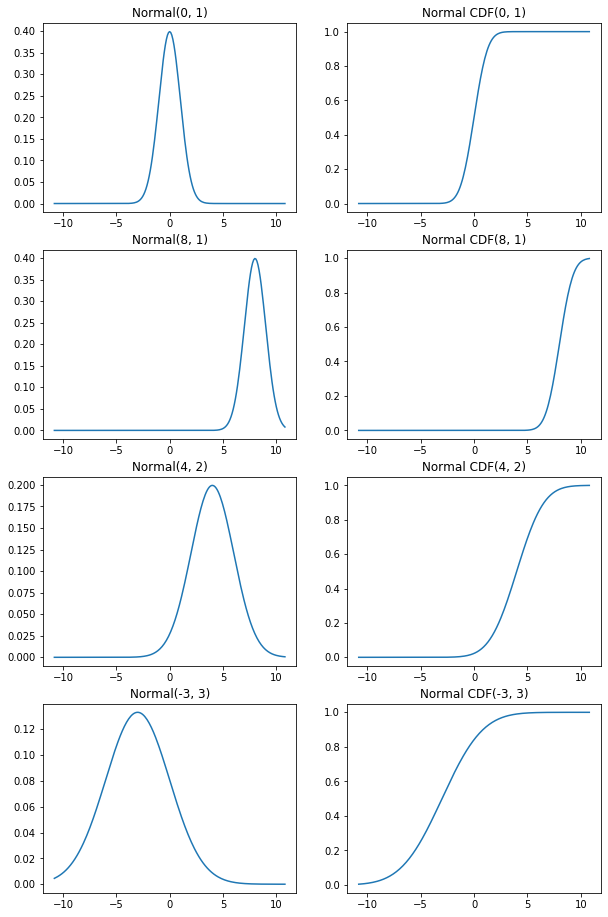

In [268]:

Norms, Norms_cdf = make_ndistribution(moments=[(0,1),(8,1),(4,2),(-3,3)],fix_size=True,draw=True)

#### 90th percentiles

In [540]:
i = 0
for X, Y in Norms_cdf:
    i += 1
    print("90th percentile in case {} is equal {}".format(i,X[Y < 0.05][-1]))

90th percentile in case 1 is equal -1.7158878504672899
90th percentile in case 2 is equal 6.257943925233645
90th percentile in case 3 is equal 0.7065420560747668
90th percentile in case 4 is equal -7.973831775700933


#### 70th percentile

In [518]:
i = 0
for X, Y in Norms_cdf:
    i += 1
    print("70th percentile in case {} is equal {}".format(i,X[Y < 0.15][-1])) 
 

70th percentile in case 1 is equal -1.1102803738317757
70th percentile in case 2 is equal 6.863551401869158
70th percentile in case 3 is equal 1.9177570093457934
70th percentile in case 4 is equal -6.157009345794392


## II. Binomial Distribution


1. A multiple-choice test has 15 questions, each of which has:
   
        i) five choices, 
        ii) two choices. 
    
    An un-prepared student taking the test answers each of the questions completely randomly by choosing an arbitrary answer. Suppose Xdenotes the number of answers that the student gets right. The student passes  the  exam if the  number of correct answers is at least 8.

    Calculate  the  probability of his/her success. Solve the above problem using:

       a)Binomial distribution,
       b)Normal distribution.
       
    Is  this  approximation accurate?

    In order to get the  better approximation, add  0.5 to x or subtract 0.5 from x (use x + 0.5 or x –0.5). The number 0.5 is called the continuity correction factor. 
    
    

2. Suppose that 53% children prefer chocolate ice-cream over strawberry. A sample random of 300 kids is surveyed. Use binomial and normal distribution to find:

      a)the probability that at least 150 favor chocolate ice-cream.
      b)the probability that at most 160 favor chocolate ice-cream.
      c)the probability that more than 155 favor chocolate ice-cream.
      d)the probability that fewer than 147 favor chocolate ice-cream.e)the probability that exactly 175 favor chocolate ice-cream.


In [189]:
n_of_questions = 15
n_of_choices_options = [5,2]
n_corr_required = 8

In [196]:
from scipy.stats import binom

In [399]:
def make_bdistribution(params, draw = True):
    
    x = [ np.arange(n+1) for n,p in params ]
        
    B_dists = [(X, binom.pmf(X, param[0], param[1])) for X, param in list(zip(x,params))]
    B_dists_cdf = [(X, binom.cdf(X, param[0], param[1])) for X, param in list(zip(x,params))]
    I = list(range(len(params)))
    
    if draw is True:
        figsize = (10, len(params)*5)
        plt.tight_layout()
        fig, axes = plt.subplots(len(params),2,figsize=figsize)
        

        for i in I:
            axes[i,0].set_title('Binomial{}'.format(params[i]))
            axes[i,1].set_title('Binomial CDF{}'.format(params[i]))

        for  i, param in list(zip(I,B_dists)):
            axes[i,0].plot(param[0], param[1], 'bo', ms=8) 
        for  i, param in list(zip(I,B_dists_cdf)):
            axes[i,1].step(param[0], param[1]) 
    
    return B_dists,B_dists_cdf
    

<Figure size 432x288 with 0 Axes>

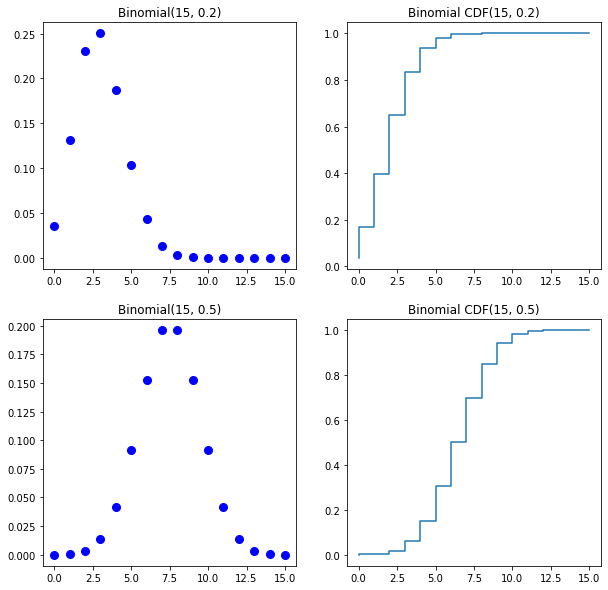

In [396]:
Binms,Binms_cdf = make_bdistribution(params=[(15,0.2), (15,0.5)], draw = True)

In [352]:
[ 1 - Y[ X == 7][0] for X, Y in Binms_cdf]

[0.004239749709823992, 0.5000000000000002]

In [359]:
conf_int = [ ((1 - Y[ X == 6][0] + 1 - Y[ X == 7][0])/2,(1 - Y[ X == 7][0] + 1 - Y[ X == 8][0])/2) for X, Y in Binms_cdf]
i = 0
for item in conf_int:
    i += 1
    print("Confidence interval for case {} using binomial distribution is ({:5.4f} - {:5.4f})".format(i,item[1],item[0]))

Confidence interval for case 1 using binomial distribution is (0.0025 - 0.0111)
Confidence interval for case 2 using binomial distribution is (0.4018 - 0.5982)


In [361]:
from math import sqrt
_, Ndist_cdf = make_ndistribution(moments=[(15*0.2,sqrt(15*0.2*0.8)),((15*0.5,sqrt(15*0.5*0.5)))], fix_size = True, draw=False)

In [362]:
[ 1 - Y[ X > 7][0] for X, Y in Ndist_cdf]

[0.004095269344148278, 0.5825806578790849]

In [363]:
conf_int = [ (1-Y[ X > 6.5 ][0],1 - Y[ X > 7.5][0]) for X, Y in Ndist_cdf]
i = 0
for item in conf_int:
    i += 1
    print("Confidence interval for case {} using normal distribution is ({:5.4f} - {:5.4f})".format(i,item[1],item[0]))

Confidence interval for case 1 using normal distribution is (0.0015 - 0.0102)
Confidence interval for case 2 using normal distribution is (0.4795 - 0.6802)


In [406]:
Binms,Binms_cdf = make_bdistribution(params=[(300,0.53)], draw = False)

In [422]:
X, Y = Binms_cdf[0]
X_p, Y_p = Binms[0]
a = 1 - Y[ X == 150][0]
b = Y[X == 160][0]
c = 1 - Y[X == 156][0]
d = Y[X == 146][0]
e = Y_p[X_p == 175][0]

In [423]:
print("a = {:.4}, b = {:.4}, c = {:.4}, d = {:.4}, e = {:.4}".format(a,b,c,d,e))

a = 0.8373, b = 0.5684, c = 0.6142, d = 0.07421, e = 0.008329


### III. Central Limit theorem
1. Generate the uniform probability distribution function in the interval [1,10]. Use a random number gen-erator to randomly select f̶i̶v̶e two hundred samples of size 𝑛=5, 𝑛=10, 𝑛=20, 𝑛=30, 𝑛=50.
        
        a) calculate the mean and standard deviation of your samples,
        b) draw histograms of the population and histogram of your samples, compare and comment the shape,
        c) fit the normal distribution to the histograms from b). 
        d) compare parameters of the normal distributions with a). Comment differences or similarities.

In [610]:
sample_cases = [[1 + np.random.random_sample(num_of_samples )*9 for _ in range(300)] for num_of_samples in [5,10,20,30,50]]

In [611]:
sample_means = [[sample.mean() for sample in samples] for samples in sample_cases]

In [612]:
import seaborn as sns
%matplotlib inline

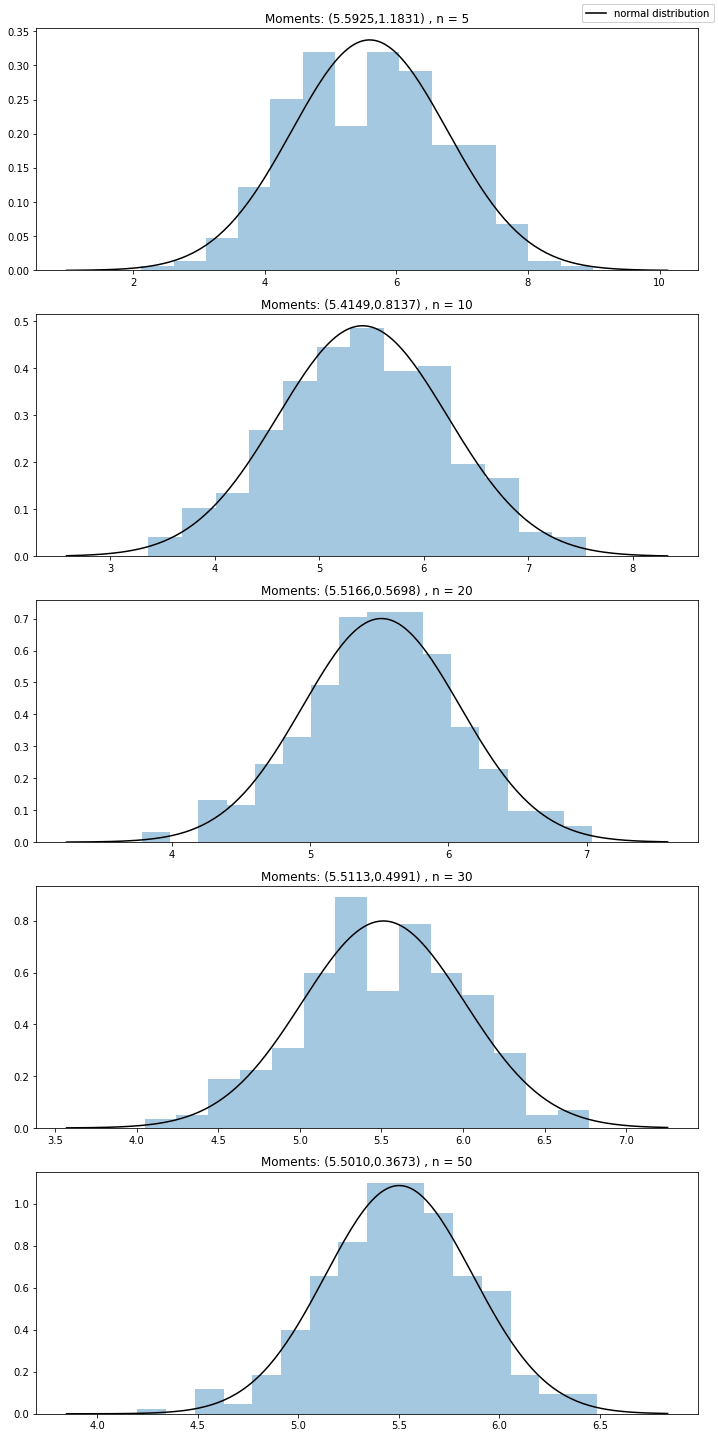

In [616]:
figsize = (10,20)
fig, axes = plt.subplots(len(means),1,figsize=figsize)

i = 0
for sample_mean in sample_means:
    plt.tight_layout()
    mean = np.array(sample_mean).mean()
    stdev = np.array(sample_mean).std()
    axes[i].set_title("Moments: ({:.4f},{:.4f}) , n = {}".format(mean,stdev,[5,10,20,30,50][i]))
    fig.legend(['normal distribution'])
    sns.distplot(sample_mean, ax = axes[i], fit=norm,kde=False,fit_kws={"color": "k", "lw": 1.5})
    i += 1

### Conclusion
    -The sample distribution of sample means proves to be roughly normally distributed.